This notebook aims to find important features from given data set using Random Forest Classifier

# Import Libraries

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator,TransformerMixin
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Finding Feature Scores

In [3]:
df=pd.read_csv(r'data/Clean_df.csv')
X=df.drop(["default.payment.next.month"],axis=1)
y=df["default.payment.next.month"]

In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [5]:

rf=RandomForestClassifier(n_estimators=200,random_state=42,min_samples_leaf=35,max_features='sqrt',max_depth=5,criterion='gini')
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=35,
                       n_estimators=200, random_state=42)

In [6]:

feature_importances = rf.feature_importances_

# Get the feature names
feature_names = X_train.columns

# Create a DataFrame with feature names and importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Print the sorted DataFrame
feature_importance_df.head(10)

,Feature,Importance
5,PAY_0,0.357188
6,PAY_2,0.168410
8,PAY_4,0.091280
7,PAY_3,0.088229
10,PAY_6,0.066871
9,PAY_5,0.052550
17,PAY_AMT1,0.031492
0,LIMIT_BAL,0.023453
18,PAY_AMT2,0.017969
20,PAY_AMT4,0.016040


In [7]:
imp_features=feature_importance_df['Feature'][:5]
imp_features.to_list()

['PAY_0', 'PAY_2', 'PAY_4', 'PAY_3', 'PAY_6']

<AxesSubplot:xlabel='Importance', ylabel='Feature'>

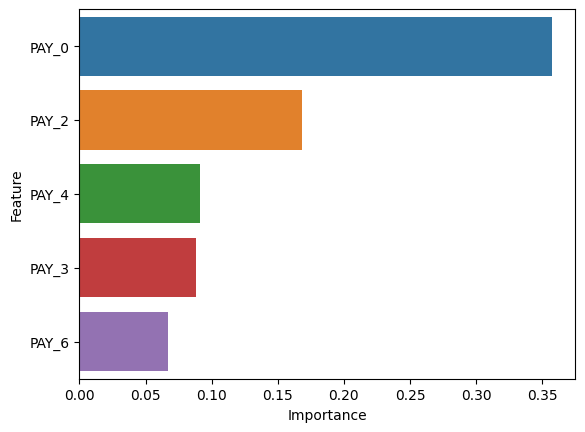

In [9]:
sns.barplot(data=feature_importance_df.head(5),x='Importance',y='Feature')


#### Observation

- The following are the important features for corresponding target feature
-Let's take 5 important features among them